In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from statsmodels.api import Logit
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [4]:
data = pd.read_csv('https://raw.githubusercontent.com/benvictoria17/Finance/main/dataset/autoPrice/dataset_2193_autoPrice.csv')
data.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,class
0,2,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.4,10.0,102,5500,24,30,13950
1,2,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.4,8.0,115,5500,18,22,17450
2,1,158,105.8,192.7,71.4,55.7,2844,136,3.19,3.4,8.5,110,5500,19,25,17710
3,1,158,105.8,192.7,71.4,55.9,3086,131,3.13,3.4,8.3,140,5500,17,20,23875
4,2,192,101.2,176.8,64.8,54.3,2395,108,3.50,2.8,8.8,101,5800,23,29,16430


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          159 non-null    int64  
 1   normalized-losses  159 non-null    int64  
 2   wheel-base         159 non-null    float64
 3   length             159 non-null    float64
 4   width              159 non-null    float64
 5   height             159 non-null    float64
 6   curb-weight        159 non-null    int64  
 7   engine-size        159 non-null    int64  
 8   bore               159 non-null    float64
 9   stroke             159 non-null    float64
 10  compression-ratio  159 non-null    float64
 11  horsepower         159 non-null    int64  
 12  peak-rpm           159 non-null    int64  
 13  city-mpg           159 non-null    int64  
 14  highway-mpg        159 non-null    int64  
 15  class              159 non-null    int64  
dtypes: float64(7), int64(9)
me

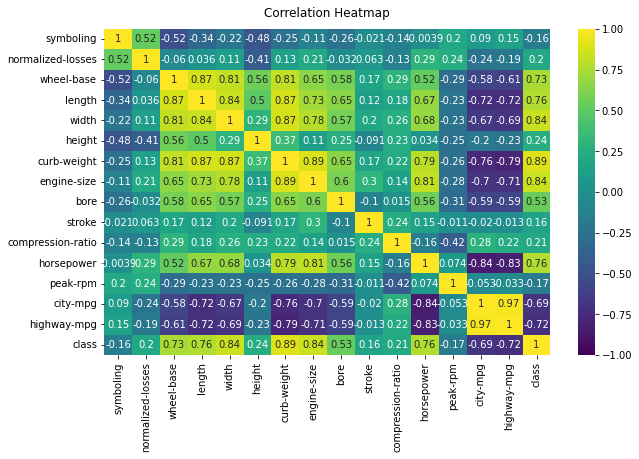

In [6]:
plt.figure(figsize=(10,6))

heatmap = sns.heatmap(data.corr(), vmin=-1,vmax=1, annot=True, cmap='viridis')

heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)
plt.show()

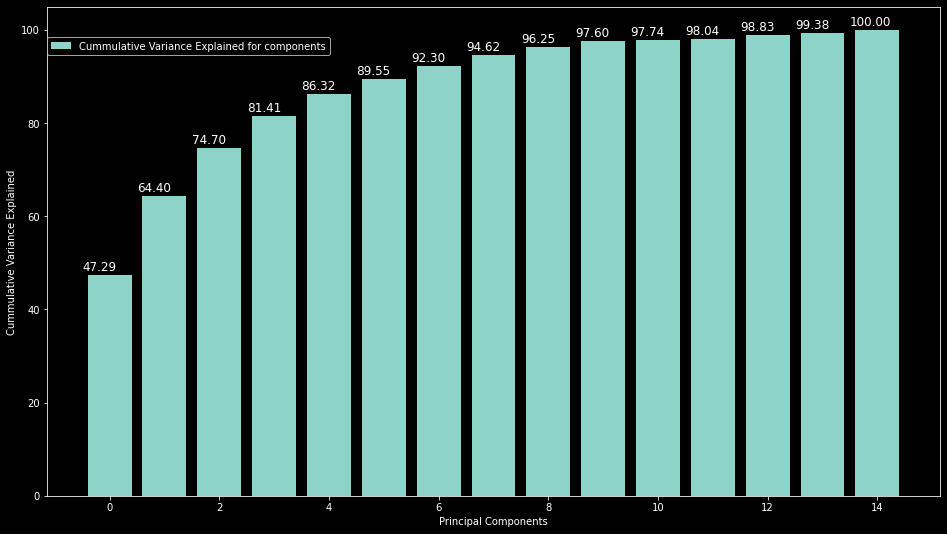

In [7]:
Predictors = data[data.columns.values.tolist()[0:-1]]
Target = data[['class']]
corr_mat = Predictors.corr()

eig_vals, eig_vectors = np.linalg.eig(corr_mat)

total_sum = sum(eig_vals)
var_exp = [(i/total_sum)*100 for i in eig_vals]
cum_var_exp = np.cumsum(var_exp)

with plt.style.context('dark_background'):
    plt.figure(figsize=(16,9))
    plt.bar(range(15),cum_var_exp, label='Cummulative Variance Explained for components')
    plt.xlabel('Principal Components')
    plt.ylabel('Cummulative Variance Explained')
    plt.legend(loc=(0,0.9))
    for i in range(15):
        plt.text(x = i-0.5 , y = cum_var_exp[i]+1, s = '{:.2f}'.format(cum_var_exp[i]), size = 12)

In [8]:
acp = PCA(n_components=9)
PCA_Predictors = acp.fit_transform(Predictors)
PCA_Predictors = pd.DataFrame(PCA_Predictors)
PCA_Predictors.head()

,0,1,2,3,4,5,6,7,8
0,-346.780667,211.858745,35.574981,4.049209,-7.285214,-7.707030,1.839546,2.286134,0.348397
1,21.840463,531.080886,26.858030,12.876538,1.199694,0.406841,-7.753328,1.424619,-0.976941
2,37.079383,543.922106,18.939691,18.252530,1.877923,-15.009096,-0.561648,-0.419887,0.205237
3,220.124463,703.141517,15.515992,13.400517,-21.047737,-5.252983,0.559570,0.561772,0.619559
4,-499.713614,476.874846,53.600069,18.147966,-5.101350,-7.954652,0.436980,1.590104,1.702255


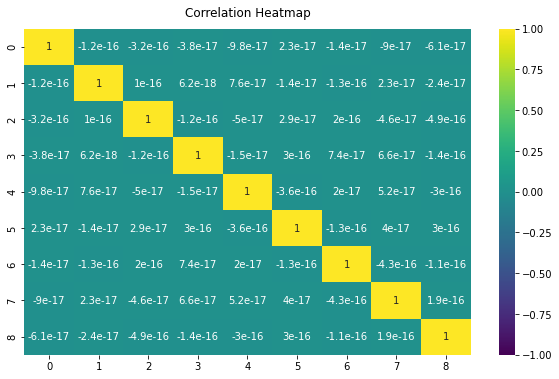

In [9]:
plt.figure(figsize=(10,6))

heatmap = sns.heatmap(PCA_Predictors.corr(), vmin=-1,vmax=1, annot=True, cmap='viridis')

heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)
plt.show()

In [10]:
X_tr, X_tst, Y_tr, Y_tst = train_test_split(PCA_Predictors,Target,test_size=0.25, shuffle=True, random_state=0)

In [11]:
KNN_m = KNeighborsRegressor()

KNN_m.fit(X_tr,Y_tr)

print('The accuracy given by R^2 has been: {:.4f}'.format(KNN_m.score(X_tst,Y_tst)))

Y_pred = KNN_m.predict(X_tst)
rmse = np.sqrt(mean_squared_error(Y_pred,Y_tst))
print('The model has a rmse of: {:.2f}'.format(rmse))

Price_mean = np.mean(Y_tst["class"])
error=rmse/Price_mean
print('The error is: {:.2f}%'.format(error*100))

The accuracy given by R^2 has been: 0.8744
The model has a rmse of: 2040.50
The error is: 19.30%


In [12]:
DTR = DecisionTreeRegressor(random_state=42)

results = DTR.fit(X_tr,Y_tr)
print('The accuracy by the criterion',results.criterion, 'has been: {:.4f}'.format(results.score(X_tst,Y_tst)))

Y_pred = results.predict(X_tst)
rmse = np.sqrt(mean_squared_error(Y_pred,Y_tst))
print('The model has a rmse of: {:.2f}'.format(rmse))
Price_mean = np.mean(Y_tst["class"])
error=rmse/Price_mean
print('The error is: {:.2f}%'.format(error*100))

The accuracy by the criterion mse has been: 0.8674
The model has a rmse of: 2096.00
The error is: 19.83%


In [13]:
RFR = RandomForestRegressor(oob_score=True, random_state=42)

results = RFR.fit(X_tr,np.array(Y_tr).ravel())

print('The Out Of Bag score is: {:.2f}'.format(results.oob_score))
print('The accuracy by the criterion',results.criterion,'has been: {:.2f}%'.format(results.score(X_tst,Y_tst)*100))

Y_pred = results.predict(X_tst)
rmse = np.sqrt(mean_squared_error(Y_pred,Y_tst))
print('The model has a rmse of: {:.2f}'.format(rmse))

Price_mean = np.mean(Y_tst["class"])
error=rmse/Price_mean
print('The error is: {:.2f}%'.format(error*100))

The Out Of Bag score is: 1.00
The accuracy by the criterion mse has been: 87.77%
The model has a rmse of: 2013.69
The error is: 19.05%
